<a href="https://colab.research.google.com/github/dlrbdjs/linear_algebra2_personal/blob/main/202110958_%EC%9D%B4%EA%B7%9C%EC%96%B8_%EC%8B%A4%EC%8A%B55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# 활성화 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 피드포워드를 수행하는 함수
def feed_forward(x,W1,W2,b1,b2):
    # 입력 레이어
    a1=x
    # 히든 레이어
    z2=np.dot(W1,a1)+b1
    a2=sigmoid(z2)
    # 출력레이어
    # a3에 신경망의 출력이 저장된다.
    z3=np.dot(W2,a2)+b2
    a3=sigmoid(z3)

    return a1,a2,a3,z2,z3
# 신경망은 총 3개의 레이어로 굿어되며
# 입력 레이어의 노드 개수3, 히든레이어 개수 3, 출력 레이어 개수 1

node_size={'input_layer_size':3,
            'hidden_layer_size':3,
            'output_layer_size':1}
# 초기 가중치 값으로 무작위 값을 사용
# 각 넘파이 배열 생성 시 아규먼트에 포함되는 레이어 순서를 봐주면 된다.

W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])
#학습 데이터 세트 (특성 x, 라벨 Y)
X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])
#특성 하나인 x에 대해 피드 포워드로 수행
#라벨 하나인 y는 비용 계싼을 위해 사용
for x,y in zip(X,Y):
    # 특성과 가중치를 사용하여 피드포워드를 수행하고 결과를 리턴 받는다.
    a1,a2,a3,z1,z2=feed_forward(x,W1,W2,b1,b2)
    #신경망의 출력 a3와 라벨y로 부터 비용을 계산한다
    #L2 Norm 계산을 위해 넘파이에서 제공하는 함수를 사용
    print('a3={},y={},Error(L2 Norm)={}'.format(a3,y,np.linalg.norm((y-a3),2)))

a3=[0.89052333],y=1,Error(L2 Norm)=0.10947666763381725
a3=[0.88805472],y=0,Error(L2 Norm)=0.8880547175673047
a3=[0.90864388],y=0,Error(L2 Norm)=0.9086438762659217
a3=[0.90210553],y=0,Error(L2 Norm)=0.902105534173179
a3=[0.91016147],y=1,Error(L2 Norm)=0.08983853145737497
a3=[0.90052873],y=1,Error(L2 Norm)=0.09947127442862369
a3=[0.91529214],y=0,Error(L2 Norm)=0.9152921388816136


0/1000, x=-10.000000,f(x)=205.000000, gradient=-0.300000,gradient sign=-
50/1000, x=-0.462545,f(x)=9.839400, gradient=-0.109251,gradient sign=-
100/1000, x=3.010707,f(x)=-16.042712, gradient=-0.039786,gradient sign=-
150/1000, x=4.275560,f(x)=-19.475186, gradient=-0.014489,gradient sign=-
200/1000, x=4.736181,f(x)=-19.930399, gradient=-0.005276,gradient sign=-
250/1000, x=4.903925,f(x)=-19.990770, gradient=-0.001921,gradient sign=-
300/1000, x=4.965012,f(x)=-19.998776, gradient=-0.000700,gradient sign=-
350/1000, x=4.987259,f(x)=-19.999838, gradient=-0.000255,gradient sign=-
400/1000, x=4.995360,f(x)=-19.999978, gradient=-0.000093,gradient sign=-
450/1000, x=4.998310,f(x)=-19.999997, gradient=-0.000034,gradient sign=-
500/1000, x=4.999385,f(x)=-20.000000, gradient=-0.000012,gradient sign=-
Min Value of Cost Function is x=4.99950726213442.


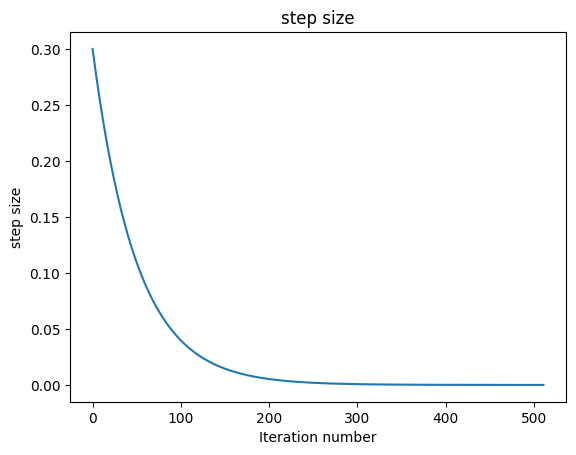

0/1000, x=10.000000,f(x)=5.000000, gradient=0.100000,gradient sign=+
50/1000, x=6.820848,f(x)=-16.684511, gradient=0.036417,gradient sign=+
100/1000, x=5.663098,f(x)=-19.560301, gradient=0.013262,gradient sign=+
150/1000, x=5.241480,f(x)=-19.941687, gradient=0.004830,gradient sign=+
200/1000, x=5.087940,f(x)=-19.992267, gradient=0.001759,gradient sign=+
250/1000, x=5.032025,f(x)=-19.998974, gradient=0.000640,gradient sign=+
300/1000, x=5.011663,f(x)=-19.999864, gradient=0.000233,gradient sign=+
350/1000, x=5.004247,f(x)=-19.999982, gradient=0.000085,gradient sign=+
400/1000, x=5.001547,f(x)=-19.999998, gradient=0.000031,gradient sign=+
450/1000, x=5.000563,f(x)=-20.000000, gradient=0.000011,gradient sign=+
Min Value of Cost Function is x=5.000498954013208.


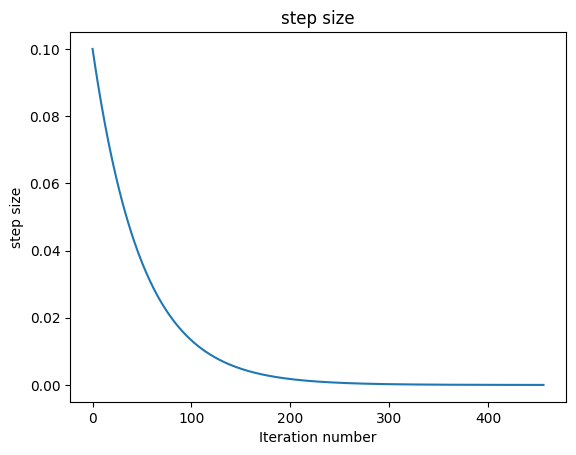

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#최소값을 구할 2차 함수
def f(x):
  return np.power(x-5,2)-20
#주어진 2차 함수의 1차 미분함수
def f_derivative(x):
  return 2*x-10
#경사 하강법을 구현한 함수
def gradient_descent(next_x,gamma,precision,max_iteration):
    #반복할 떄마다 이동한 거리의 변화 추이를 살펴보기 위해 리스트에 저장
    list_step=[]
    #주어진 함수의 최소값을 찾기 위해 최대 max_iteration만큼 반복
    for i in range(max_iteration):
        #현재 위치에서 기울기를 뺀 위치를 업데이트한다.
        #계산된 위치는 다음 번 반복시 현재 위치로 사용
        current_x=next_x
        next_x=current_x-gamma*f_derivative(current_x)
        #현재 위치에서 다음 위치까지 이동하는 거리 (x좌표 기준)를 측정해서 리스트에 저장
        step=next_x-current_x
        list_step.append(abs(step))
        #50번 반복할 때마다 로그를 출력
        if i%50 ==0:
            print('{}/{}, x={:5.6f},' .format(i,max_iteration,current_x), end="")
            gradient = gamma*f_derivative(current_x)
            print('f(x)={:5.6f}, gradient={:5.6f},'.format(f(current_x),gradient), end="")
            print('gradient sign={}'.format('+' if f_derivative(current_x)>0 else '-'))
        #지정한 값보다 이동한 거리가 작아지면 루프를 중지한다.
        if abs(step)<=precision:
            break
    #최종적으로 구한 최소값 위치에 있는 x좌표
    print('Min Value of Cost Function is x={}.'.format(current_x))
    #이동한 거리의 변화 추이를 그래프로 그린다.
    Figure,ax=plt.subplots(1,1)
    ax.title.set_text('step size')
    ax.plot(list_step)
    ax.set_ylabel('step size')
    ax.set_xlabel('Iteration number')
    plt.show()
#시작 위치가 음수인 경우 경사 하강법을 수행
gradient_descent(next_x=-10, gamma=0.01, precision =0.00001, max_iteration=1000)
#시작 위치가 양수인 경우 경사 하강법을 수행
gradient_descent(next_x=10, gamma=0.01, precision=0.00001, max_iteration=1000)

0/1000 cost:0.03438588774105045
100/1000 cost:0.18621140476581888
200/1000 cost:0.16004041173964428
300/1000 cost:0.157928031159622
400/1000 cost:0.022620403034219732
500/1000 cost:0.03963794236278024
600/1000 cost:0.05597190551178646
700/1000 cost:0.008522910398824104
800/1000 cost:0.018078400525439627
900/1000 cost:0.02798115228694592
1000/1000 cost:0.050177492286720526


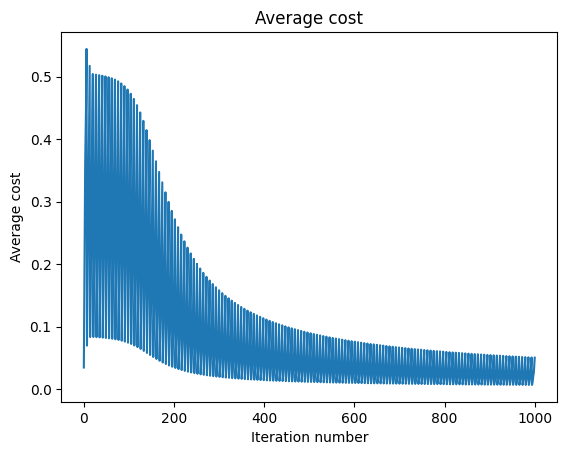

1
[0.95447365]
0
[0.02603514]
0
[0.03514226]
0
[0.04743941]
1
[0.97422325]
1
[0.92416171]
0
[0.09327221]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def feed_forward(x,W1,W2,b1,b2):
    a1=x
    z2=np.dot(W1,a1)+b1
    a2=sigmoid(z2)
    z3=np.dot(W2,a2)+b2
    a3=sigmoid(z3)
    return a1,a2,a3,z2,z3
node_size={'input_layer_size':3,
           'hidden_layer_size':3,
           'output_layer_size':1}

learning_rate=2.0
W2=np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])
X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])
count=0
max_iteration=1000
dataset_size=len(Y)
list_average_cost=[]

while count < max_iteration:
    dW2=np.zeros((node_size['output_layer_size'],node_size['hidden_layer_size']))
    dW1=np.zeros((node_size['hidden_layer_size'],node_size['input_layer_size']))
    db2=np.zeros(node_size['output_layer_size'])
    db1=np.zeros(node_size['hidden_layer_size'])
    average_cost=0
    for x,y in zip(X,Y):
        a1,a2,a3,z2,z3=feed_forward(x,W1,W2,b1,b2)
        #역전파 알고리즘을 실행
        delta3=-(y-a3)*sigmoid_derivative(z3)
        average_cost+=np.linalg.norm((y-a3),2)/dataset_size
        delta2=np.dot(W2.T,delta3)*sigmoid_derivative(z2)
        dW2+=np.dot(delta3[:,np.newaxis],np.transpose(a2[:,np.newaxis]))/dataset_size
        db2+=delta3/dataset_size
        dW1+=np.dot(delta2[:,np.newaxis],np.transpose(a1[:,np.newaxis]))/dataset_size
        db1+=delta2/dataset_size
        #역전파 알고리즘 실행결과를 사용하여 신경망의 가중치와 편향을 업데이트 한다.
        W2+=-learning_rate*dW2
        b2+=-learning_rate*db2
        W1+=-learning_rate*dW1
        b1+=-learning_rate*db1
        #매 반복 시 측정된 비용을 리스트에 저장
        list_average_cost.append(average_cost)
        if count%100 ==0:
            print('{}/{} cost:{}'.format(count,max_iteration,average_cost))
        count +=1
    #반복횟수에 대비 비용그래프로 그린다.
Figure,ax=plt.subplots(1,1)
ax.title.set_text('Average cost')
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt. show()

for x,y in zip(X,Y):
    a1,a2,a3,z2,z3=feed_forward(x,W1,W2,b1,b2)
    print(y)
    print(a3)